# Twitter Data Science

### Start off by importing all the nescesary libraries 

In [4]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import functions as f

### Gather all tweets from flatiron schools accounts and save them

In [5]:
f.scrape_tweets('flatironschool', 'flatiron_tweets.csv')

NameError: name 'f' is not defined

### Organize the data into a pandas dataframe

In [6]:
df = pd.read_csv("justin_tweets.csv")

/Users/matt/.pyenv/versions/3.8.3/envs/tweet/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
df.head()

id      conversation_id     created_at        date  \
0  1254905336697413634  1254905336697413634  1588027721000  2020-04-27   
1  1254803601727336448  1254803601727336448  1588003466000  2020-04-27   
2  1254746695906267141  1254746695906267141  1587989899000  2020-04-27   
3  1254620910163763200  1254594238525902849  1587959909000  2020-04-26   
4  1254620586929766400  1254616022646226951  1587959832000  2020-04-26   

       time timezone    user_id   username                        name place  \
0  18:48:41      EDT  155933135  muzzeltov  #BlackLivesMatter ✊🏿✊🏾✊🏽✊🏼   NaN   
1  12:04:26      EDT  155933135  muzzeltov  #BlackLivesMatter ✊🏿✊🏾✊🏽✊🏼   NaN   
2  08:18:19      EDT  155933135  muzzeltov  #BlackLivesMatter ✊🏿✊🏾✊🏽✊🏼   NaN   
3  23:58:29      EDT  155933135  muzzeltov  #BlackLivesMatter ✊🏿✊🏾✊🏽✊🏼   NaN   
4  23:57:12      EDT  155933135  muzzeltov  #BlackLivesMatter ✊🏿✊🏾✊🏽✊🏼   NaN   

   ... geo source user_rt_id user_rt  retweet_id  \
0  ... NaN    NaN        NaN     NaN         NaN   
1  ... NaN    NaN        NaN     NaN         NaN   
2  ... NaN    NaN        NaN     NaN         NaN   
3  ... NaN    NaN        NaN     NaN         NaN   
4  ... NaN    NaN        NaN     NaN         NaN   

                                            reply_to  retweet_date translate  \
0  [{'user_id': '155933135', 'username': 'muzzelt...           NaN       NaN   
1  [{'user_id': '155933135', 'username': 'muzzelt...           NaN       NaN   
2  [{'user_id': '155933135', 'username': 'muzzelt...           NaN       NaN   
3  [{'user_id': '155933135', 'username': 'muzzelt...           NaN       NaN   
4  [{'user_id': '155933135', 'username': 'muzzelt...           NaN       NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 34 columns]

In [8]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [9]:
shape = df.shape
print(f'rows: {shape[0]} cols: {shape[1]}')

rows: 16857 cols: 34


### filter the dataframe to keep data features I want

In [10]:
keep = ['date','time','user_id','tweet','mentions','replies_count',
        'retweets_count', 'likes_count', 'hashtags']

In [11]:
tweet_df = df.copy()[keep]

In [12]:
tweet_df.head()

date      time    user_id  \
0  2020-04-27  18:48:41  155933135   
1  2020-04-27  12:04:26  155933135   
2  2020-04-27  08:18:19  155933135   
3  2020-04-26  23:58:29  155933135   
4  2020-04-26  23:57:12  155933135   

                                               tweet          mentions  \
0  *Narrator voice*: “He (Trump) was that somebod...                []   
1  I miss @Bethenny’s one-liners from here #RHONY...      ['bethenny']   
2  My new kink is responding to the stupid takes ...                []   
3  👏🏻👏🏻 I’ll drink to that! 👏🏻👏🏻 pic.twitter.com/...          ['kedz']   
4                                My kindred spirit 🥰  ['connorcrosby']   

   replies_count  retweets_count  likes_count    hashtags  
0              0               4           20          []  
1              0               0            8  ['#rhony']  
2              1               0           46          []  
3              0               0            2          []  
4              0               0            1          []

In [13]:
tweet_df["date"] = tweet_df["date"].astype("datetime64")

In [14]:
tweet_df.date.value_counts()

2016-10-19    128
2019-12-31    122
2019-12-30    108
2019-12-29    100
2020-02-20     98
             ... 
2012-01-23      1
2010-08-23      1
2012-12-20      1
2012-03-04      1
2012-03-30      1
Name: date, Length: 2620, dtype: int64

In [15]:
likes = tweet_df.likes_count.sum()
print (f'Total likes: {likes}')

Total likes: 109882


In [16]:
likes = tweet_df.likes_count.sum()
replies = tweet_df.replies_count.sum()
total = tweet_df.shape[0]
print (f'Total likes: {likes}')
print (f'Total replies: {replies}')
print (f'Total tweets: {total}')

Total likes: 109882
Total replies: 7630
Total tweets: 16857


In [17]:
## Natural Language Processing

In [18]:
#data cleanup

In [19]:
#make tweets list from string
tweet_df.hashtags = tweet_df.hashtags.apply(lambda x: eval(x))


In [20]:
#import nlp library spacy

import spacy

nlp = spacy.load("en_core_web_md")

In [21]:
nlp_df = df.copy()[['date','tweet', 'hashtags']]

In [22]:
#regular expression to remove url
import re
def strip_url(tweet):
    try:
        clean_tweet = re.sub(r"pic.\S+", "", tweet)
        return clean_tweet.strip()
    except:
        return tweet.strip()

In [23]:
#create tokens with spacy
nlp_df['clean_tweet'] = nlp_df.tweet.apply(lambda x: strip_url(x))

In [25]:
#put all tokens into corups objects
corpus = []

for doc in nlp_df.clean_tweet:
    d = (list(filter(lambda x: x.is_stop==False,nlp(doc))))
    d = (list(filter(lambda x: x.is_punct==False, d)))
    d = (list(filter(lambda x: x.like_url==False, d)))
    d = (list(map(lambda x: x.lemma_, d)))
    corpus.append(d)

In [26]:
stop = ['',' ', '  ', '\n\n','\n' '🏻']
clean_corpus = [list(filter(lambda word: word not in stop, doc)) for doc in corpus]

In [27]:
#phrase model
from gensim.models import Phrases

bigram = Phrases(clean_corpus)

In [28]:
phrase_corpus = [bigram[doc] for doc in clean_corpus]

In [29]:
#create number of hashtags
hash_count = {}
for mention in tweet_df.hashtags:
    if len(mention) !=0 :
        for person in mention:
            hash_count[person] = hash_count.get(person, 0) + 1

In [30]:
#create word frequency
word_freq = {}
for doc in phrase_corpus:
    for word in doc:
        word_freq[word] = word_freq.get(word,0) + 1

In [31]:
word_counts = pd.DataFrame(word_freq.items())
word_counts.columns = ['word','count']
hash_count = pd.DataFrame(hash_count.items())
hash_count.columns = ['hashtag', 'count']

In [32]:
word_counts.sort_values('count', ascending=False, inplace=True)

In [33]:
word_counts.head(50)

word  count
1205          cancer_m    987
196              today    811
146               love    793
129               like    694
111               time    675
37                need    644
182                ♂_️    586
80                 get    582
9                 good    577
218              thank    573
527                day    571
201               know    561
180              right    516
64                want    511
335              think    506
1878   @HillaryClinton    485
136                 go    449
11                come    445
760                 \n    440
203                ❤_️    413
28                 let    403
56                feel    384
901   @realDonaldTrump    367
672             people    352
253                way    345
10               thing    340
347               work    339
59                 man    316
466               life    312
36                   🥰    300
13                 new    294
315              great    291
1766               win    282
569               vote    279
241               🤦_🏻‍    276
355            tonight    273
169               make    273
177               look    266
32                 👏_🏻    264
580               well    264
265                 oh    262
130              tweet    261
718               wait    260
367              woman    260
354              watch    249
168               hope    245
60                   😍    244
320                try    242
181               🤷_🏻‍    240
480                yes    234

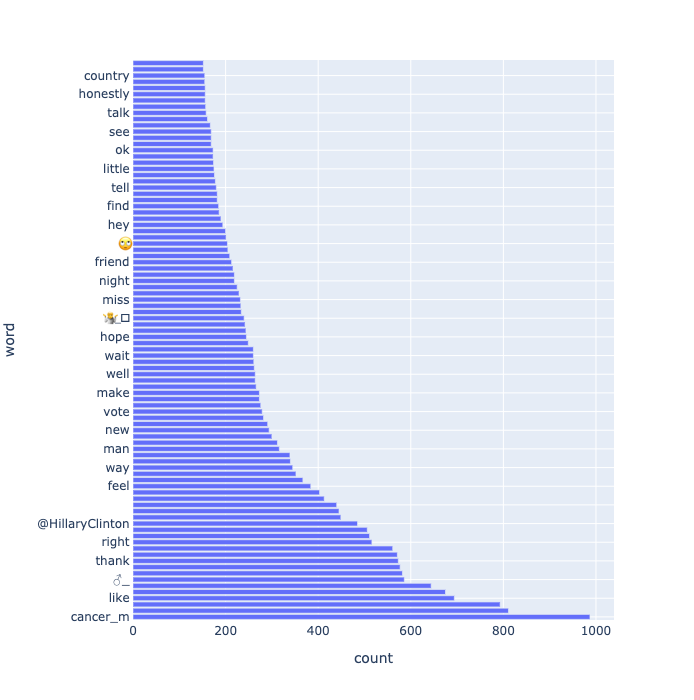

In [34]:
import plotly.express as px

fig = px.bar(word_counts[:90],x='count', y='word', orientation='h'
      ,width=800, height=700)
fig.write_html("justin.html")
fig.show()

In [35]:
hash_count.sort_values('count', ascending=False, inplace=True)

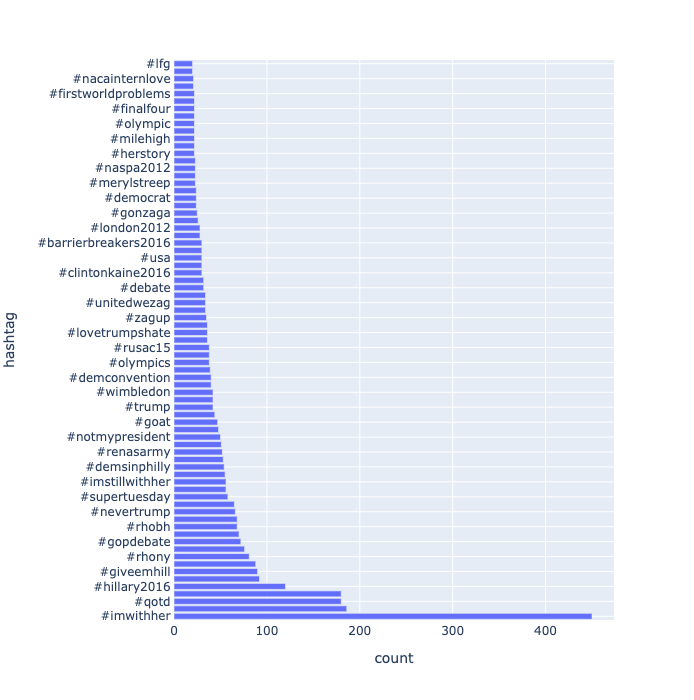

In [36]:
fig = px.bar(hash_count[:75],x='count', y='hashtag', orientation='h'
      ,width=800, height=700)
fig.write_html("justin_hashtags.html")
fig.show()

In [37]:
!pip install wordcloud

     |████████████████████████████████| 225kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 2.2MB 918kB/s eta 0:00:01
  Running setup.py install for wordcloud ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [38]:
from wordcloud import WordCloud
corpus_str = list(map(lambda x: (' ').join(x),phrase_corpus))

In [39]:
hash_str = (' ').join(list(hash_count.hashtag))

# Generate a word cloud image for hashtags

(-0.5, 399.5, 199.5, -0.5)

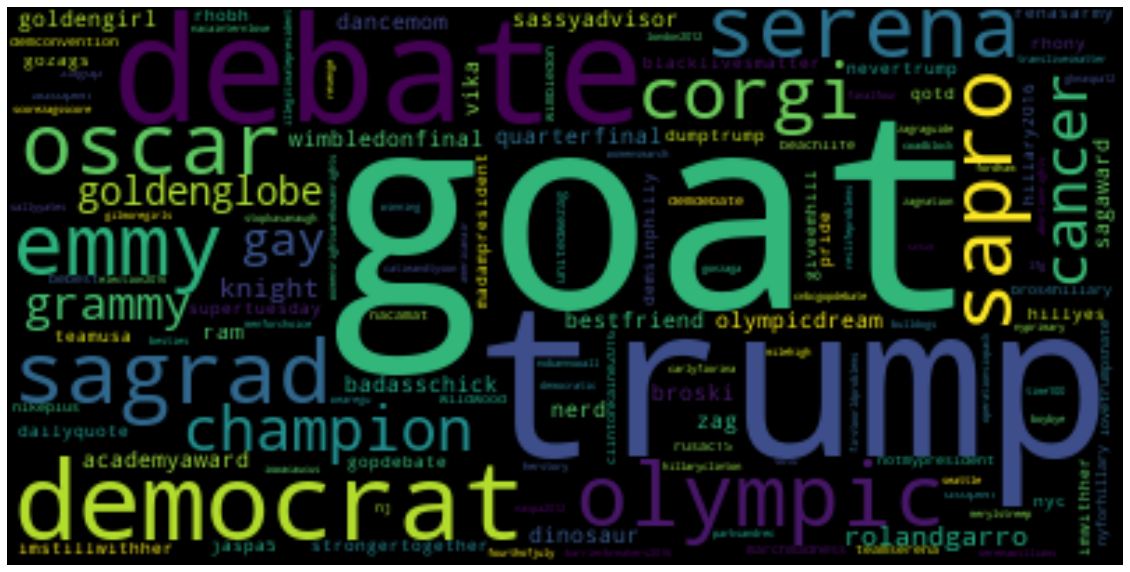

In [43]:
wordcloud = WordCloud().generate((' ').join(list(hash_count.hashtag)))
wordcloud.to_file('justin_hash.png')

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

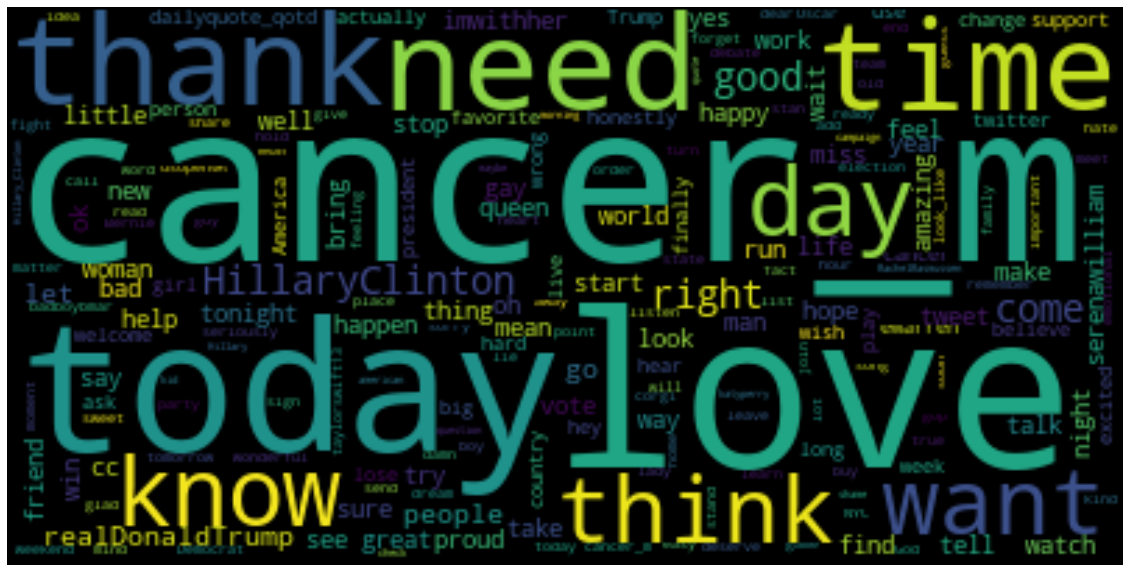

In [41]:
wordcloud = WordCloud().generate((' ').join(corpus_str))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Text Generation via recurrent neural network

In [42]:
from textgenrnn import textgenrnn
textgen=textgenrnn('flatironschool_twitter_weights.hdf5',vocab_path='flatironschool_twitter_vocab.json',
                  config_path='flatironschool_twitter_config.json')
textgen.generate_samples(n=15)

ModuleNotFoundError: No module named 'textgenrnn'

In [ ]:
#avg tweet sentiment?? over time graph